In [37]:
import glob
import nibabel as nib
import numpy as np
import os
import cupy as cp
import pandas as pd
import re
import time
import seaborn as sns
from joblib import Parallel, delayed


In [26]:
fast_mask = '/home/orco/data/kinderseg/HBN_MRI/derivatives/fastsurfer/{}/mri/aparc.DKTatlas+aseg.deep.withCC.mgz'

In [27]:
frees_mask = '/home/orco/data/kinderseg/HBN_MRI/derivatives/freesurfer/{}.reconall/mri/aparc.DKTatlas+aseg.mgz'

In [28]:
nfast_mask = fast_mask + '/home/orco/data/kinderseg/NORMDATA/derivatives/fastsurfer/{}/mri/aparc.DKTatlas+aseg.deep.mgz'
nfree_mask = frees_mask + '/home/orco/data/kinderseg/NORMDATA/derivatives/freesurfer/{}.reconall/mri/aparc.DKTatlas+aseg.mgz'

In [29]:
table = '/usr/local/freesurfer/FreeSurferColorLUT.txt'
with open(table, 'r') as t:
    l = t.readlines()
    l= [i for i in l if re.search(r'^[0-9]', i)] # take each line starting with a number
    name_map = pd.DataFrame([' '.join(i.split()).split() for i in l])[[0,1]].set_index(1).to_dict()[0]
    num_map = pd.DataFrame([' '.join(i.split()).split() for i in l])[[0,1]].set_index(0).to_dict()[1]

In [30]:
subids = [i for i in os.listdir('/home/orco/data/kinderseg/HBN_MRI/derivatives/fastsurfer') if i.startswith('sub-')]
#subids                                                                                                        

In [31]:
f = fast_mask.format(subids[0])
img = nib.load(f)
arr = img.get_fdata()
roinums = np.unique(arr)


In [32]:
roinames = [num_map[str(int(i))] for i in roinums]

In [34]:
def count_voxels(f1, f2,n):
    arr1 = nib.load(f1).get_fdata()
    arr2 = nib.load(f2).get_fdata()
    arr1 = np.where(arr1==n,1,0)
    arr2 = np.where(arr2==n,1,0)
    return (arr1.sum(), arr2.sum())

In [40]:
start = time.time()
d = dict()
for i in subids:
    try:
        d[i] = Parallel(n_jobs=32)(delayed(count_voxels)(fast_mask.format(i),frees_mask.format(i),n) for n in roinums)
        print('made: ', i)
    except:
        print('skipped: ', i)
stop = time.time()
print(stop-start)
#700.2829542160034

made:  sub-NDARCE721YB5
made:  sub-NDARME930DE7
skipped:  sub-NDARRU499DP2
made:  sub-NDARNH147WGN
made:  sub-NDARFW292PBD
made:  sub-NDARMT882AWE
skipped:  sub-NDARVV473XTY
made:  sub-NDARJM708VGE
made:  sub-NDAREG590BNY
made:  sub-NDARPW482TVE
made:  sub-NDARHM475DC5
made:  sub-NDARRK882CLT
made:  sub-NDARKL327VRH
skipped:  sub-NDARWC427JB2
skipped:  sub-NDARRZ199KNG
skipped:  sub-NDARUM569EV1
skipped:  sub-NDARUC356FCD
made:  sub-NDARMD575AXD
made:  sub-NDARLY114PDC
made:  sub-NDARLA516PH1
skipped:  sub-NDARWA544RDT
skipped:  sub-NDARZM903TNL
skipped:  sub-NDARTZ018PD5
made:  sub-NDARWR628EFJ
skipped:  sub-NDARYW789GNP
made:  sub-NDARNU249EDF
made:  sub-NDARFL411AT1
skipped:  sub-NDARUK719URM
skipped:  sub-NDARWK793VK4
made:  sub-NDARDJ825GBP
skipped:  sub-NDARWM656UWL
skipped:  sub-NDARYL272HDW
made:  sub-NDARRB338YZ0
skipped:  sub-NDARUG507AZX
made:  sub-NDARMJ333WJM
skipped:  sub-NDARZT772PU4
skipped:  sub-NDARMF508PA2
skipped:  sub-NDARTC527WPZ
made:  sub-NDARPJ151ERK
made:  sub

In [49]:
corr = pd.DataFrame(d)
corr['roinames'] = roinames
corr = corr.set_index('roinames')

In [52]:
corr = corr.transpose()

In [54]:
corr = corr[corr.columns[1:]]

In [55]:
corr

roinames,Left-Cerebral-White-Matter,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,ctx-rh-precentral,ctx-rh-precuneus,ctx-rh-rostralanteriorcingulate,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-transversetemporal,ctx-rh-insula
sub-NDARCE721YB5,"(215769, 211098)","(4877, 5844)","(254, 289)","(11835, 12745)","(56836, 54116)","(8150, 8125)","(4255, 4424)","(5890, 5794)","(2164, 2129)","(631, 712)",...,"(14794, 16141)","(17420, 18807)","(3770, 2411)","(17632, 17909)","(37161, 36837)","(15941, 17316)","(20344, 20922)","(12313, 14793)","(1148, 1216)","(8014, 6976)"
sub-NDARME930DE7,"(186621, 186446)","(8639, 8545)","(308, 319)","(12269, 13706)","(48573, 46827)","(7781, 7612)","(3217, 3083)","(5007, 4816)","(1701, 1784)","(761, 793)",...,"(13979, 14143)","(12954, 11741)","(2523, 2487)","(14416, 17851)","(32107, 32200)","(13032, 12881)","(17028, 18719)","(9424, 10366)","(1140, 1152)","(5601, 5756)"
sub-NDARNH147WGN,"(164647, 163997)","(4593, 4669)","(156, 169)","(11013, 12367)","(51482, 51385)","(6127, 6715)","(3364, 3542)","(5123, 4582)","(1850, 2168)","(272, 469)",...,"(11840, 12425)","(11576, 11671)","(2289, 2176)","(12755, 12950)","(29099, 27916)","(12422, 12929)","(16697, 16815)","(10547, 10675)","(1024, 1215)","(6691, 6583)"
sub-NDARFW292PBD,"(193304, 194976)","(3002, 2880)","(411, 444)","(11282, 10781)","(53388, 50986)","(6964, 7225)","(3528, 3544)","(5275, 5267)","(1938, 1984)","(567, 507)",...,"(11179, 11892)","(9801, 10127)","(2222, 2152)","(11427, 12551)","(27432, 28299)","(11322, 10962)","(17518, 18147)","(10328, 9078)","(1272, 1312)","(6102, 6226)"
sub-NDARMT882AWE,"(190330, 187275)","(1893, 2278)","(42, 40)","(12459, 13327)","(51462, 50302)","(6515, 7215)","(2825, 2645)","(4808, 4386)","(1970, 1915)","(484, 600)",...,"(12407, 12529)","(11342, 10266)","(2488, 1929)","(12680, 12793)","(30538, 30217)","(11579, 11698)","(15290, 15695)","(9947, 11460)","(714, 789)","(6030, 6020)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-NDARCX053GU5,"(180219, 173116)","(2782, 2990)","(100, 185)","(11289, 13252)","(60545, 57350)","(7580, 7567)","(3356, 3329)","(4797, 4447)","(1888, 1799)","(536, 562)",...,"(11654, 13145)","(13140, 12472)","(2518, 1924)","(12680, 11099)","(32726, 31501)","(14481, 15141)","(18525, 18361)","(11082, 12151)","(1061, 1133)","(7365, 6515)"
sub-NDARAV610EY3,"(268873, 264565)","(3929, 4766)","(260, 280)","(15915, 16222)","(72761, 70925)","(9720, 9441)","(4701, 4237)","(6588, 6014)","(2461, 2312)","(491, 639)",...,"(15221, 14417)","(16915, 17233)","(3933, 3244)","(20386, 16317)","(37315, 39395)","(16904, 15224)","(20912, 20868)","(15236, 16437)","(1201, 1298)","(9877, 7695)"
sub-NDARHJ945PV0,"(200975, 196064)","(4209, 4679)","(150, 257)","(11105, 12184)","(58684, 55915)","(8081, 7390)","(3905, 3865)","(5856, 5561)","(1991, 1882)","(886, 1001)",...,"(14927, 13808)","(12288, 11217)","(3055, 2277)","(14771, 14021)","(33393, 32891)","(11123, 11663)","(19157, 17603)","(8893, 10658)","(1116, 1183)","(7042, 5125)"
sub-NDARBK082PDD,"(225513, 222932)","(1710, 3529)","(340, 546)","(14475, 14683)","(61444, 57716)","(8000, 7687)","(3827, 3254)","(5682, 4843)","(1988, 2328)","(600, 638)",...,"(14450, 15357)","(13751, 12545)","(4214, 3027)","(15211, 13363)","(36189, 36900)","(12902, 11975)","(20338, 20343)","(10184, 11084)","(1249, 1214)","(8467, 7246)"


In [67]:
from scipy.stats import pearsonr

In [69]:
pearsons = corr.apply(lambda x: pearsonr(np.array(list(x))[:,0], np.array(list(x))[:,1]))

In [97]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
sns.set_theme(style="whitegrid", palette="colorblind")
sns.set_style("ticks")
plt.rcParams.update({'figure.autolayout': True,
                    'axes.labelsize': 25,
                    'axes.titlesize':25,
                    'xtick.labelsize':16,
                     'ytick.labelsize': 20})


/home/orco/anaconda3/envs/fastsurfer/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


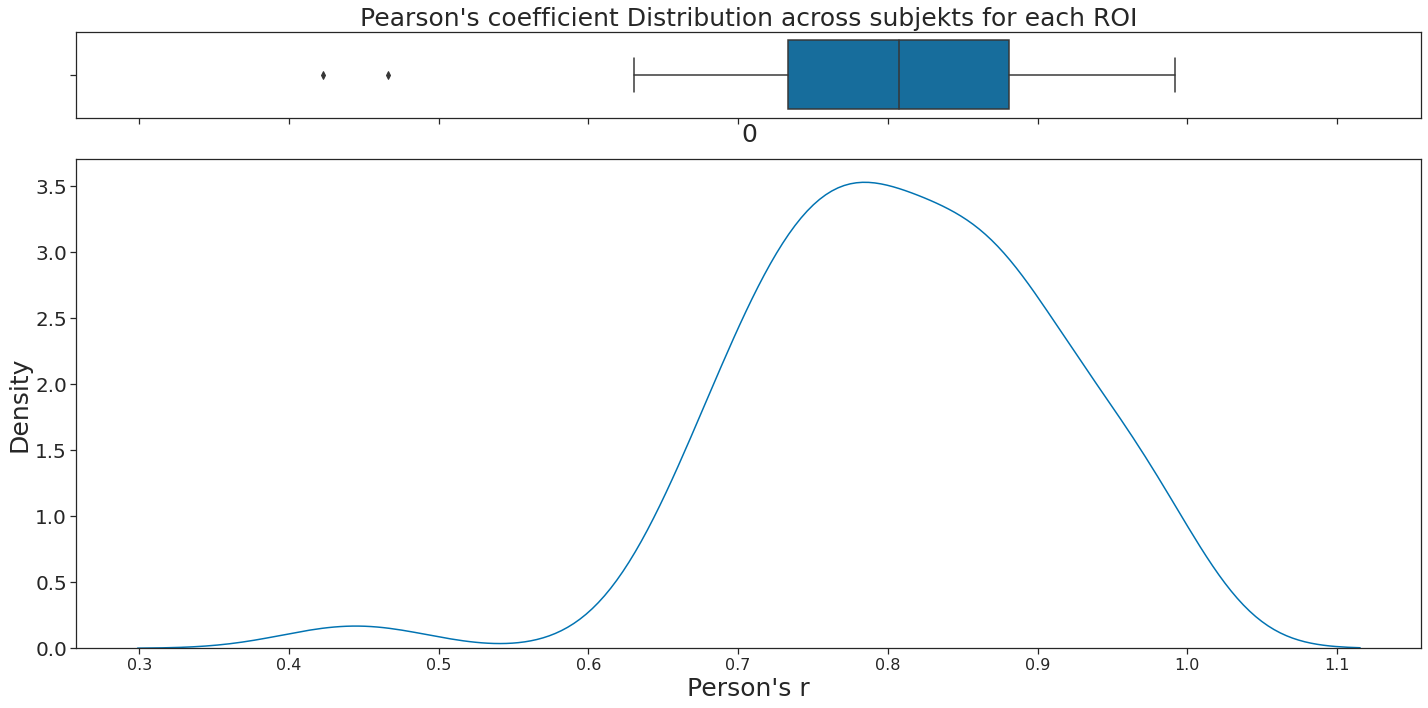

In [104]:

# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(pearsons.iloc[0], ax=ax_box).set_title('Pearson\'s coefficient Distribution across subjekts for each ROI')
plt.xlabel('')
sns.kdeplot(pearsons.iloc[0], ax=ax_hist)
plt.xlabel('Person\'s r')
plt.tight_layout()
plt.savefig("corr.jpg", dpi=600)


In [110]:
p2 = pearsons.transpose()

In [112]:
p2[p2[0] <0.5]

,0,1
roinames,,
ctx-lh-entorhinal,0.422850,2.039599e-06
ctx-rh-entorhinal,0.466229,1.172392e-07


In [ ]:
ctx-rh-entorhinal	